<a href="https://colab.research.google.com/github/sandaruwanWGMA/Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Brain Tumor Classification using Convolutional Neural Networks (CNN)

In this notebook, we will develop a Convolutional Neural Network (CNN) to classify brain tumor images into four different categories and a fifth category for images without tumors. The dataset contains images of brain scans, and our goal is to create a model that can accurately classify these scans.

#### Project Overview

- **Dataset**: The dataset consists of brain scan images categorized into four distinct classes, each representing a different type of brain tumor (e.g., glioma, meningioma, pituitary, and no tumor). The "no tumor" category contains images of brain scans without any tumors.

- **Data Preprocessing**: Prior to training the model, we will preprocess the data. This includes resizing images, normalizing pixel values, and splitting the dataset into training and testing sets.

- **Training and Evaluation**: We will train the CNN on the training data and evaluate its performance on the test data. We will use metrics such as accuracy, precision, recall, and F1-score to assess how well the model can classify brain tumor images into the four categories and distinguish images without tumors.

- **Visualization**: Throughout the notebook, we will use Matplotlib to visualize training history, sample brain scan images, and model predictions.

- **Model Architecture**: Our CNN model will consist of multiple convolutional layers, pooling layers, and fully connected layers. This architecture is designed to automatically learn features from the brain scan images.

In [ ]:
!ls

sample_data


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1hMjVF4MJmumZ3FYwMcz3UMSq4rfz-iTG'})
downloaded.GetContentFile('data.zip')

In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: brain_tumor_dataset/category3_tumor/pt_img (285).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (274).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (291).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (290).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (3).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (294).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (283).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (301).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (276).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (30).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (284).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (275).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (295).jpg  
  inflating: brain_tumor_dataset/category3_tumor/pt_img (272).jpg  
  inflating: brain_tumor_dataset

In [ ]:
!ls

brain_tumor_dataset  data.zip  sample_data


# **Impact of Setting GPU Memory Growth:**

**Purpose:**

The provided code is used to manage GPU memory growth when training deep learning models using TensorFlow. Its primary purpose is to avoid Out-of-Memory (OOM) errors, which can occur when the GPU memory is insufficient to accommodate the demands of the model and data.

**Impact:**

1. **Preventing OOM Errors:** The key impact of setting GPU memory growth is the prevention of Out-of-Memory errors. These errors can abruptly terminate model training, causing frustration and delays in the development process.

2. **Dynamic Memory Allocation:** By enabling memory growth, TensorFlow allocates GPU memory dynamically as needed during model execution. It avoids the pre-allocation of the entire GPU memory, which can lead to memory exhaustion for large models and datasets.

3. **Efficient Resource Usage:** Memory growth ensures efficient utilization of GPU resources. It allows multiple TensorFlow processes to share GPU memory without locking out the entire GPU. This efficient resource management is crucial when working on multi-GPU systems or in shared computing environments.

4. **Improved Stability:** Ensuring that the GPU memory is used judiciously contributes to the overall stability of the training process. It allows for smoother model training without abrupt interruptions due to memory constraints.

In summary, setting GPU memory growth is a vital practice in deep learning to ensure that GPU resources are used efficiently and that model training runs without memory-related disruptions, ultimately leading to a more reliable and productive development process.


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

### Importing Libraries

In this project, we will be using various Python libraries for image classification using Convolutional Neural Networks (CNN). Below are the libraries and modules we'll be importing:

```python
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

Data Preprocessing:

In this code section, we perform data preprocessing for the brain tumor classification project. The dataset is located in the "brain_tumor_dataset" directory and contains images of brain scans categorized into different tumor types.

- Empty Lists: We initialize empty lists X and y to hold the images and their corresponding labels.

- Category Enumeration: We list the categories (tumor types) within the dataset directory and enumerate them to assign unique category IDs.

- Image Loading and Resizing: Using nested loops, we iterate through each category and its images. For each image, we use OpenCV (cv2) to read it and resize it to a consistent 32x32 pixel size.

- Normalization: To prepare the data for machine learning, we normalize the pixel values of each image to a range between 0 and 1. This standardizes the data and aids in model training.

- NumPy Arrays: We convert the image data (X) and labels (y) into NumPy arrays for efficient processing.

- Data Split: Finally, we split the dataset into training and testing sets. 80% of the data is allocated for training (X_train and y_train), while the remaining 20% is reserved for testing (X_test and y_test). The random_state parameter is set to 42 for reproducibility.




In [ ]:
data_dir = "brain_tumor_dataset"

# Create empty lists to store images and labels
X = []
y = []

categories = os.listdir(data_dir)
for category_id, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    for image_name in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))

        # Normalize pixel values to [0, 1]
        image = image / 255

        X.append(image)
        y.append(category_id)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Custom Data Augmentation**

In this code section, we implement **custom data augmentation techniques** to significantly enhance the **robustness and generalization capability** of our **brain tumor classification model**. Data augmentation plays a pivotal role in deep learning, particularly when dealing with a limited volume of training data. Through the application of various transformations to the original images, we aim to accomplish multiple objectives:

1. **Diverse Training Examples:** By generating new training instances with variations, we increase the diversity of our dataset.

2. **Reduced Overfitting:** Data augmentation helps mitigate the risk of overfitting, where the model memorizes the training data rather than learning meaningful patterns.

3. **Improved Model Performance:** The augmented dataset enables our model to better adapt to real-world scenarios, such as varying tumor appearances, orientations, and lighting conditions.

## Custom Augmentation Function

We introduce a bespoke data augmentation function, named `custom_data_augmentation(image)`, to apply a series of transformations to each input image:

- **Cropping:** We employ cropping to remove dark pixels from the edges, thereby intensifying the focus on the central region.

- **Rotation:** Random rotation between -45 and 45 degrees introduces variability in the orientation of brain scans.

- **Brightness and Contrast Adjustment:** By making random adjustments to brightness and contrast, we simulate varying lighting conditions.

- **Horizontal Flip:** Images undergo horizontal flipping with a 50% probability, expanding the dataset's diversity.

- **Width Shift:** A random horizontal shift within a maximum range of 20% of the image width adds further variety.

- **Zoom:** We apply random zooming, varying between 80% and 120% of the original image size.

## ImageDataGenerator with Custom Augmentation

We construct an `ImageDataGenerator` named `train_datagen` that incorporates our custom data augmentation function alongside additional augmentation parameters:

- Horizontal flipping
- Rotation
- Width shift
- Zoom

## Advantages

The utilization of custom data augmentation yields numerous advantages:

- Enriched Training Dataset: The augmentation process generates a spectrum of image variations, enriching the training dataset with diverse examples.

- Robustness: The model becomes more resilient to variations in tumor appearance, orientation, and lighting conditions that it might encounter during inference.

- Generalization: Augmentation reduces the risk of overfitting, facilitating better generalization to unseen data.

## Generator for Augmented Training Data

We operationalize our augmentation strategy through the creation of a generator for augmented training data. This generator, generated via `train_datagen.flow()`, will efficiently yield augmented image-label pairs during model training.

By seamlessly integrating custom data augmentation, we significantly enhance our model's ability to generalize and make precise predictions, even when confronted with brain tumor images exhibiting diverse characteristics.


In [ ]:
def custom_data_augmentation(image):
    # Define the cropping dimensions (remove dark pixels)
    crop_size = (tf.shape(image)[0] - 10, tf.shape(image)[1] - 10)

    # Crop the image
    image = tf.image.crop_to_bounding_box(image, 15, 15, crop_size[0], crop_size[1])

    # Rotate the image randomly between -45 and 45 degrees
    image = tf.image.random_rotation(image, 45)

    # Add other augmentation operations
    image = tf.image.random_brightness(image, max_delta=0.3)  # Adjust brightness
    image = tf.image.random_contrast(image, lower=0.4, upper=1.7)  # Adjust contrast

    # Horizontal flip
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    # Width shift
    image = tf.keras.preprocessing.image.random_shift(image, 0.2, 0.2)

    # Zoom
    image = tf.keras.preprocessing.image.random_zoom(image, (0.8, 1.2))

    return image

# Create an ImageDataGenerator with custom data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=custom_data_augmentation,  # Use custom augmentation function
    horizontal_flip=True,
    # Add other augmentation parameters as needed
    rotation_range=45,
    width_shift_range=0.2,
    zoom_range=0.2,
)

# Fit the ImageDataGenerator on your training data
train_datagen.fit(X_train)

# Create a generator for augmented training data
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32,
    shuffle=True,
)


### Exploring Data Augmentation Effects

In this code segment, we visualize the effects of data augmentation on our training images. Using three random indices from the training dataset, we display both the original and augmented images side by side. This visualization provides insights into how data augmentation diversifies the training dataset, enhancing the model's robustness and generalization capabilities.


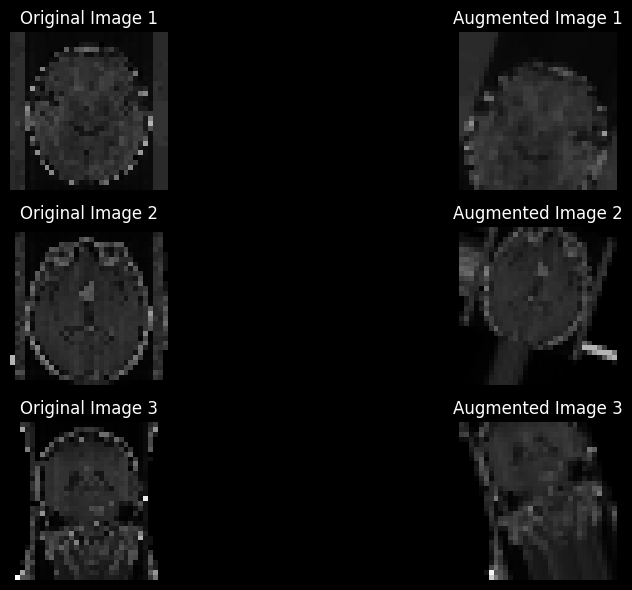

In [ ]:
import matplotlib.pyplot as plt
import random

# Select three random indices from your training dataset
indices = random.sample(range(len(X_train)), 3)

# Plot the original and augmented images
plt.figure(figsize=(12, 6))

for i, index in enumerate(indices):
    original_image = X_train[index]

    # Apply data augmentation to the original image
    augmented_image = train_datagen.random_transform(original_image)

    # Plot the original image
    plt.subplot(3, 2, i * 2 + 1)
    plt.imshow(original_image)
    plt.title(f"Original Image {i + 1}")
    plt.axis('off')

    # Plot the augmented image
    plt.subplot(3, 2, i * 2 + 2)
    plt.imshow(augmented_image)
    plt.title(f"Augmented Image {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Impact of Each Layer in CNN:**

**Convolutional Layers (Conv2D):**
- The Convolutional layers play a crucial role in feature extraction. They apply filters to the input image, detecting patterns such as edges, textures, or shapes.
- The use of 'sigmoid' activation in these layers might not be as common as 'relu' in modern networks. 'Sigmoid' can squash values to a range between 0 and 1, making it suitable for binary classification tasks or when you need to limit the output range. However, 'relu' is often preferred because it introduces non-linearity and can help mitigate the vanishing gradient problem.

**Batch Normalization Layers:**
- Batch normalization layers help stabilize and accelerate training. They normalize the activations, making them have a mean of zero and a standard deviation of one. This prevents activations from becoming too large or too small, which can expedite convergence.
- Batch normalization can also mitigate overfitting and reduce the need for careful initialization techniques.

**MaxPooling2D Layers:**
- MaxPooling2D layers reduce the spatial dimensions of the feature maps while retaining important information. This reduces computation and helps prevent overfitting.
- By selecting the maximum value from a small region of the feature map, these layers retain the most significant features, allowing the network to focus on high-level patterns.

**Flatten Layer:**
- The Flatten layer is essential for transitioning from convolutional layers to fully connected layers. It converts the 2D feature maps into a 1D vector, maintaining the spatial hierarchy of features.
- This transformation prepares the data for further processing in the fully connected layers.

**Dense (Fully Connected) Layers:**
- The first Dense layer with 128 units and 'sigmoid' activation learns high-level features from the flattened representations. It allows the network to capture complex relationships in the data.
- The final Dense layer with 4 units and 'softmax' activation is the output layer. It computes class probabilities for multiclass classification. The 'softmax' activation ensures that the output probabilities sum to 1, making it suitable for classification tasks.

**Compilation:**
- The choice of optimizer, 'rmsprop,' affects how the model's weights are updated during training. Different optimizers can lead to variations in training speed and convergence.
- The 'categorical_crossentropy' loss function is commonly used for multiclass classification problems, penalizing the model based on the difference between predicted and actual class probabilities.
- The 'accuracy' metric measures how well the model classifies the data, providing insights into its performance during training and evaluation.

**The Model Architecture**

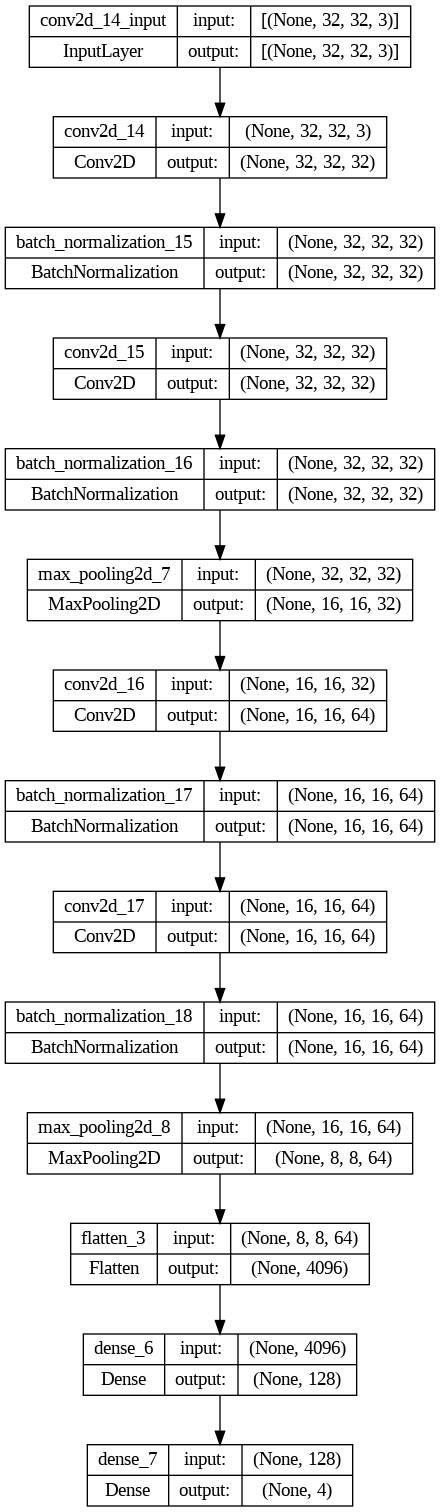

In [ ]:
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_48 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_49 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
65/65 [==============================] - 19s 272ms/step - loss: 1.1735 - accuracy: 0.5259 - val_loss: 1.7725 - val_accuracy: 0.1802
Epoch 2/15
65/65 [==============================] - 17s 256ms/step - loss: 0.6839 - accuracy: 0.7252 - val_loss: 1.9450 - val_accuracy: 0.1802
Epoch 3/15
65/65 [==============================] - 17s 262ms/step - loss: 0.5239 - accuracy: 0.7959 - val_loss: 2.8816 - val_accuracy: 0.2636
Epoch 4/15
65/65 [==============================] - 16s 254ms/step - loss: 0.4095 - accuracy: 0.8497 - val_loss: 3.4594 - val_accuracy: 0.2636
Epoch 5/15
65/65 [==============================] - 17s 263ms/step - loss: 0.3167 - accuracy: 0.8885 - val_loss: 3.5870 - val_accuracy: 0.2636
Epoch 6/15
65/65 [==============================] - 23s 350ms/step - loss: 0.2359 - accuracy: 0.9244 - val_loss: 3.2715 - val_accuracy: 0.2810
Epoch 7/15
65/65 [==============================] - 29s 450ms/step - loss: 0.1693 - accuracy: 0.9481 - val_loss: 2.7647 - val_accuracy: 0.4593

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 50ms/step - loss: 0.3940 - accuracy: 0.8899


# **Training and Validation Loss Plot:**

- The training and validation loss plot provides a visual representation of how well the model is learning over time.
- It helps identify whether the model is overfitting or underfitting:
  - If the training loss is significantly lower than the validation loss, it suggests overfitting. This means the model is fitting the training data too closely and might not generalize well to new data.
  - If both training and validation losses are high and not decreasing, it suggests underfitting. The model is too simple to capture the underlying patterns in the data.
- By monitoring loss over epochs, it allows data scientists and machine learning engineers to make informed decisions about model training. For example, they can decide when to stop training or adjust hyperparameters to improve performance.




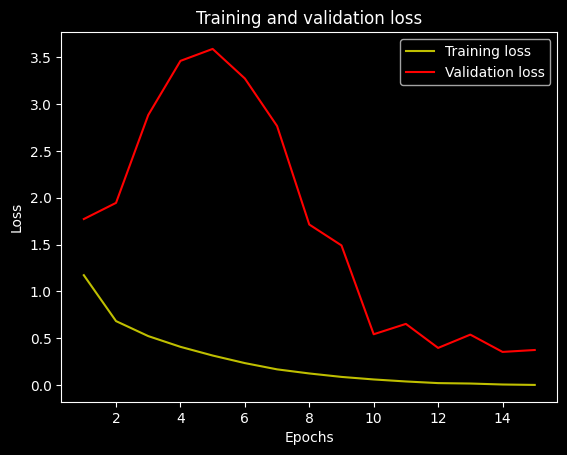

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Training and Validation Accuracy Plot:**

- The training and validation accuracy plot shows how well the model is classifying data correctly over time.
- It provides insights into the model's ability to generalize:
  - If training accuracy is significantly higher than validation accuracy, it can indicate overfitting. The model is memorizing the training data instead of learning the underlying patterns.
  - If both training and validation accuracies are low and not improving, it suggests that the model might be too simple to capture the complexity of the data.
- Monitoring accuracy during training helps in assessing the model's performance and whether it's suitable for the task at hand.
- Decision-making regarding model selection, hyperparameter tuning, and training strategies can be guided by the accuracy trends.

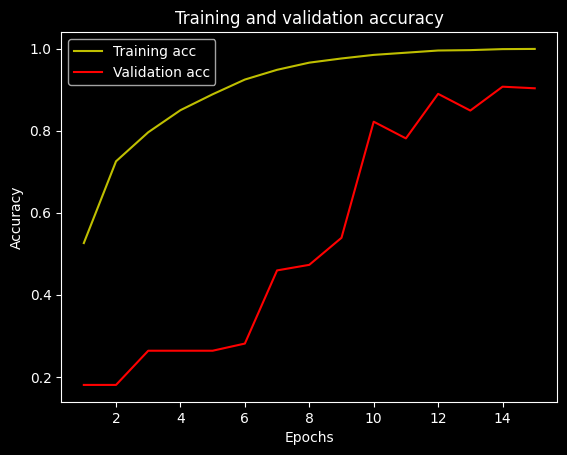

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Evaluating Model Performance:**

This code block is responsible for evaluating the performance of a trained machine learning model on a test dataset. It focuses on generating a classification report, a confusion matrix, and visualizing the confusion matrix. Here's why each part of the code is important:

**Generating Predictions:**
- The `model.predict` function is used to generate predictions on the test data (`X_test`). These predictions are stored in the `y_pred` variable.

**Converting Labels:**
- The code converts the one-hot encoded labels in `y_test` and `y_pred` to class labels using `np.argmax`. This conversion is essential for evaluating the model's performance using metrics like precision, recall, and F1-score.

**Classification Report as DataFrame:**
- The `classification_report` function from Scikit-Learn is used to compute various classification metrics such as precision, recall, and F1-score for each class.
- These metrics are organized into a Pandas DataFrame called `classification_df`, which makes it easy to read and interpret the results.
- The report is generated for different classes, in this case, "Class1," "Class2," "Class3," and "Class4."

**Confusion Matrix:**
- A confusion matrix is generated using the `confusion_matrix` function from Scikit-Learn. It provides a detailed breakdown of how many instances were correctly or incorrectly classified for each class.
- The confusion matrix helps in understanding where the model is making errors, such as false positives and false negatives.

**Plotting the Confusion Matrix:**
- Finally, the code creates a visual representation of the confusion matrix using Matplotlib and Seaborn. This heatmap visually displays the true positives, true negatives, false positives, and false negatives for each class.
- The visualization aids in quickly identifying which classes the model is performing well on and where it may need improvement.

Overall, this code is crucial for assessing the model's performance, identifying areas of improvement, and providing a clear and interpretable summary of its classification abilities.


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x791c693311b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x791c693311b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - 1s 53ms/step
Classification Report as DataFrame:
               precision    recall  f1-score     support
Class1         0.920635  0.832536  0.874372  209.000000
Class2         0.971264  0.965714  0.968481  175.000000
Class3         0.810811  0.909091  0.857143  165.000000
Class4         0.835052  0.843750  0.839378   96.000000
accuracy       0.889922  0.889922  0.889922    0.889922
macro avg  

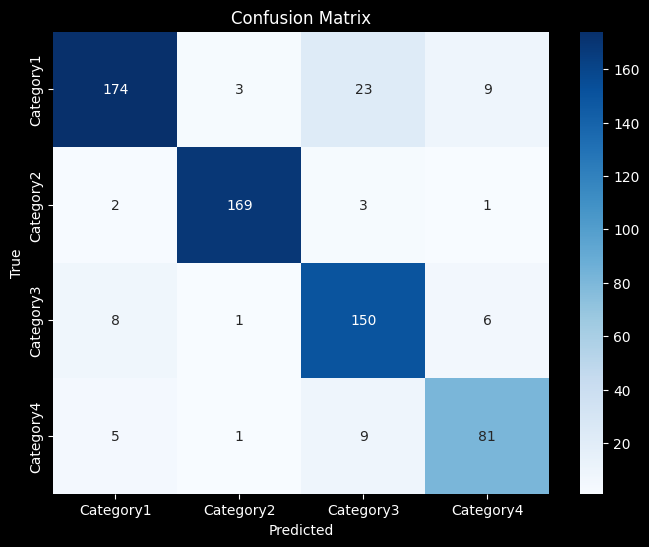

In [ ]:
# Generate predictions on the test data
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_true = [np.argmax(label) for label in y_test]
y_pred = [np.argmax(label) for label in y_pred]

# Generate the classification report as a Pandas DataFrame
classification_rep = classification_report(y_true, y_pred, target_names=["Class1", "Class2", "Class3", "Class4"], output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
print("Classification Report as DataFrame:\n", classification_df)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Category1", "Category2", "Category3", "Category4"], yticklabels=["Category1", "Category2", "Category3", "Category4"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Model Architecture**

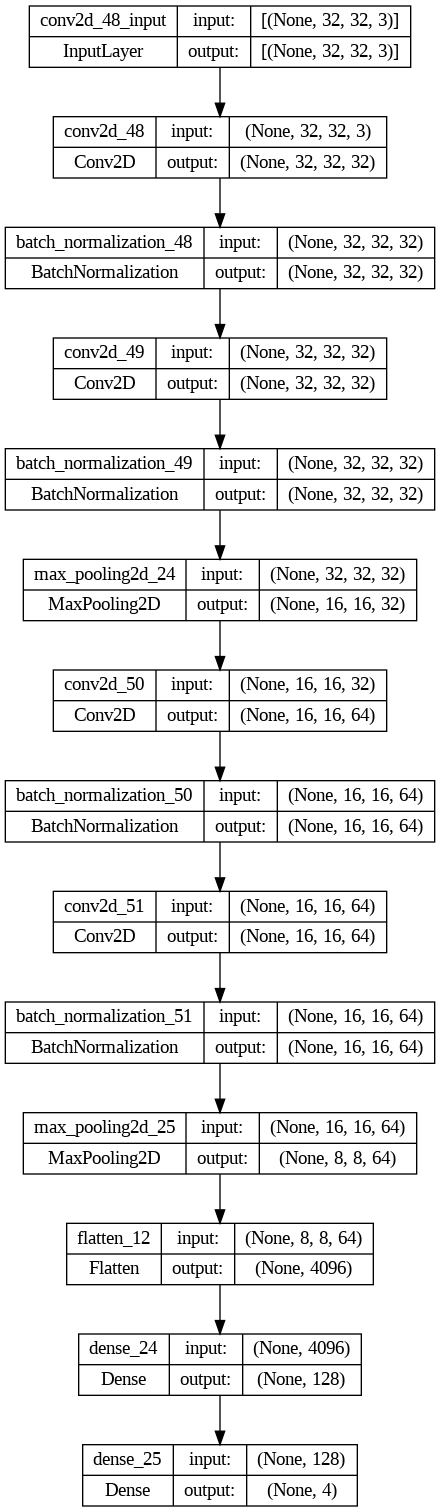

In [ ]:
# Model Architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# **Saving model as a .h5**

In [ ]:
# Saving the model as .h5
!pip install h5py

In [ ]:
model.save('brain_tumor_classification.h5')